# Autoencoder t-SNE
- MNIST
- Neural Network
- 1 hidden layers

## 1. Settings
### 1) Import required libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### 2) Set hyperparameters

In [2]:
batch_size = 16
learning_rate = 0.0002
num_epoch = 5

## 2. Data

### 1) Download Data

In [39]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, target_transform=None, download=True)

mnist_test[0][0]

### 2) Set DataLoader

In [4]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

## 4. Model & Optimizer
### 1) Model

In [14]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = nn.Linear(28*28,20)
        self.decoder = nn.Linear(20,28*28)   
                
    def forward(self,x):
        x = x.view(batch_size,-1)
        encoded = self.encoder(x)
        out = self.decoder(encoded).view(batch_size,1,28,28)
                
        return encoded,out
    
model = Autoencoder().cuda()

### 2) Loss func & Optimizer

In [6]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## 5. Train 

In [7]:
loss_arr =[]

for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = Variable(image).cuda()
        
        optimizer.zero_grad()
        _,output = model.forward(x)
        loss = loss_func(output,x)
        loss.backward()
        optimizer.step()
        
    if j % 1000 == 0:
        print(loss)
        loss_arr.append(loss.cpu().data.numpy()[0])

## 6. Check with Train Image

torch.Size([16, 28, 28])


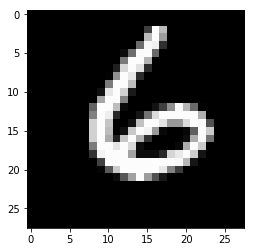

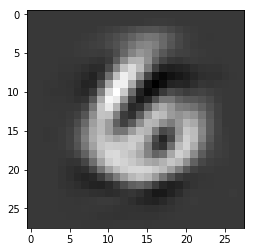

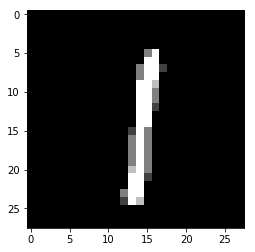

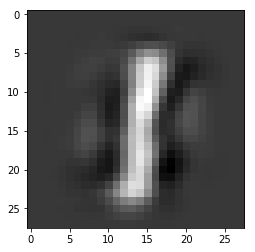

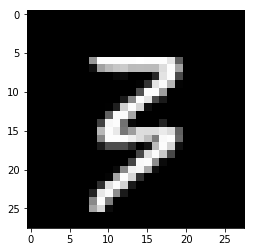

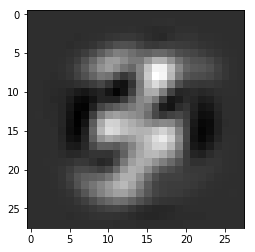

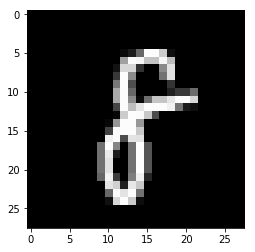

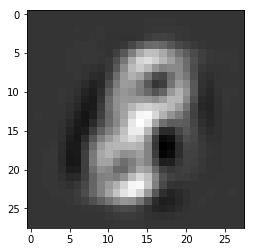

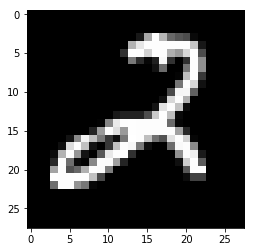

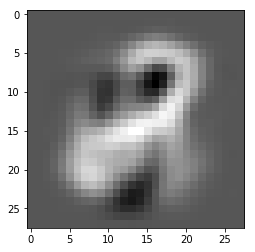

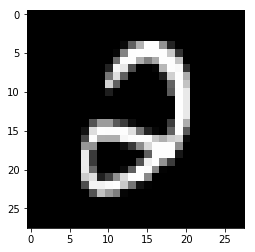

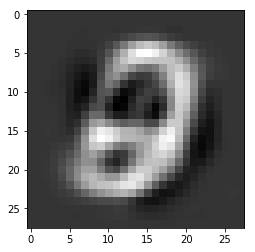

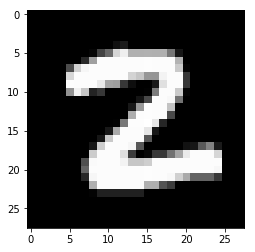

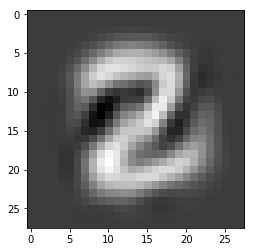

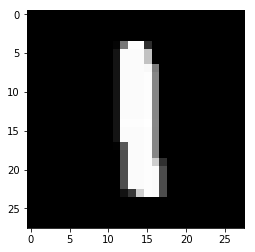

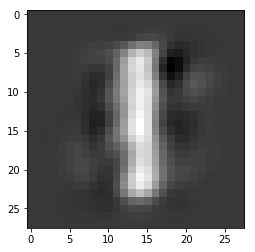

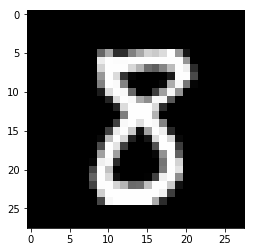

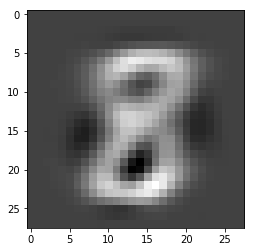

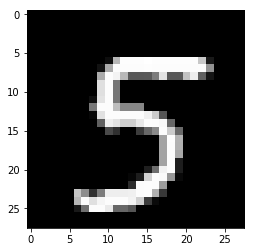

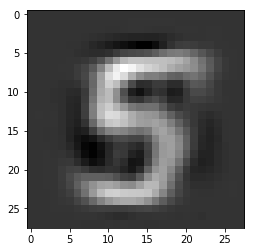

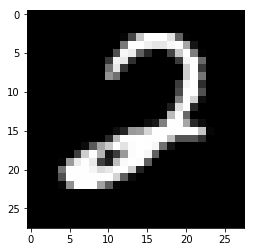

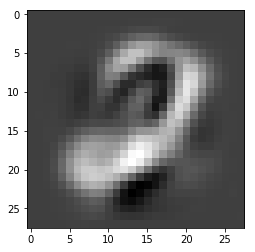

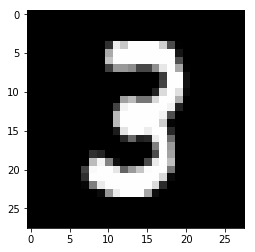

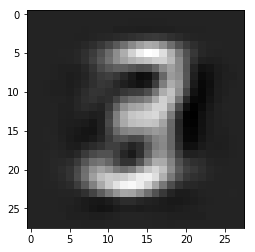

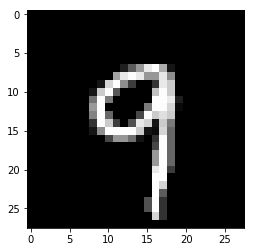

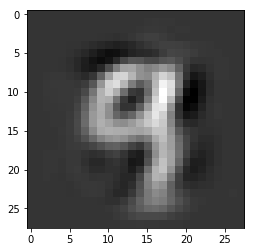

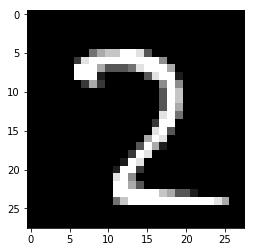

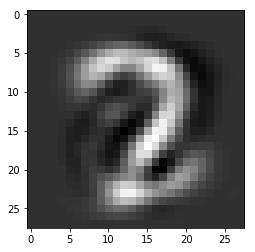

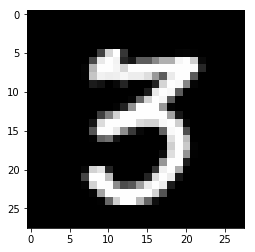

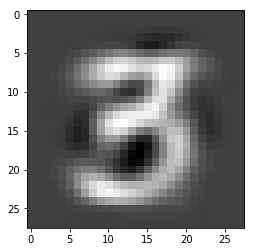

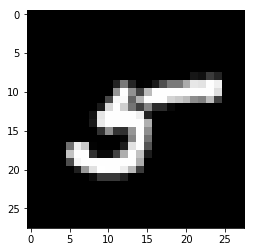

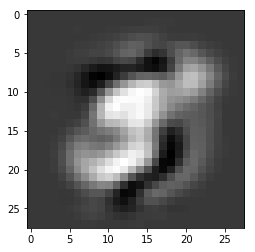

In [8]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(out_img.size()[0]):
    plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

In [26]:
total_arr = []
for i in range(1):
    for j,[image,label] in enumerate(test_loader):
        x = Variable(image).cuda()
        
        optimizer.zero_grad()
        encoded,output = model.forward(x)
        for k in range(batch_size):
            total_arr.append(encoded[k].view(-1).cpu().data.numpy())
        
        if j >125:
            break
            
print(len(total_arr))

2032


In [27]:
print("\n------Starting TSNE------\n")

tsne_model = TSNE(n_components=2, init='pca',random_state=0)
result = tsne_model.fit_transform(total_arr)

print("\n------TSNE Done------\n")


------Starting TSNE------

Made model

------TSNE Done------



In [28]:
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = image
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists


------Starting to plot------

0/2032
1/2032
2/2032
3/2032
4/2032
5/2032
6/2032
7/2032
8/2032
9/2032
10/2032
11/2032
12/2032
13/2032
14/2032
15/2032
16/2032
17/2032
18/2032
19/2032
20/2032
21/2032
22/2032
23/2032
24/2032
25/2032
26/2032
27/2032
28/2032
29/2032
30/2032
31/2032
32/2032
33/2032
34/2032
35/2032
36/2032
37/2032
38/2032
39/2032
40/2032
41/2032
42/2032
43/2032
44/2032
45/2032
46/2032
47/2032
48/2032
49/2032
50/2032
51/2032
52/2032
53/2032
54/2032
55/2032
56/2032
57/2032
58/2032
59/2032
60/2032
61/2032
62/2032
63/2032
64/2032
65/2032
66/2032
67/2032
68/2032
69/2032
70/2032
71/2032
72/2032
73/2032
74/2032
75/2032
76/2032
77/2032
78/2032
79/2032
80/2032
81/2032
82/2032
83/2032
84/2032
85/2032
86/2032
87/2032
88/2032
89/2032
90/2032
91/2032
92/2032
93/2032
94/2032
95/2032
96/2032
97/2032
98/2032
99/2032
100/2032
101/2032
102/2032
103/2032
104/2032
105/2032
106/2032
107/2032
108/2032
109/2032
110/2032
111/2032
112/2032
113/2032
114/2032
115/2032
116/2032
117/2032
118/2032
119/2032

959/2032
960/2032
961/2032
962/2032
963/2032
964/2032
965/2032
966/2032
967/2032
968/2032
969/2032
970/2032
971/2032
972/2032
973/2032
974/2032
975/2032
976/2032
977/2032
978/2032
979/2032
980/2032
981/2032
982/2032
983/2032
984/2032
985/2032
986/2032
987/2032
988/2032
989/2032
990/2032
991/2032
992/2032
993/2032
994/2032
995/2032
996/2032
997/2032
998/2032
999/2032
1000/2032
1001/2032
1002/2032
1003/2032
1004/2032
1005/2032
1006/2032
1007/2032
1008/2032
1009/2032
1010/2032
1011/2032
1012/2032
1013/2032
1014/2032
1015/2032
1016/2032
1017/2032
1018/2032
1019/2032
1020/2032
1021/2032
1022/2032
1023/2032
1024/2032
1025/2032
1026/2032
1027/2032
1028/2032
1029/2032
1030/2032
1031/2032
1032/2032
1033/2032
1034/2032
1035/2032
1036/2032
1037/2032
1038/2032
1039/2032
1040/2032
1041/2032
1042/2032
1043/2032
1044/2032
1045/2032
1046/2032
1047/2032
1048/2032
1049/2032
1050/2032
1051/2032
1052/2032
1053/2032
1054/2032
1055/2032
1056/2032
1057/2032
1058/2032
1059/2032
1060/2032
1061/2032
1062/2032
1

1836/2032
1837/2032
1838/2032
1839/2032
1840/2032
1841/2032
1842/2032
1843/2032
1844/2032
1845/2032
1846/2032
1847/2032
1848/2032
1849/2032
1850/2032
1851/2032
1852/2032
1853/2032
1854/2032
1855/2032
1856/2032
1857/2032
1858/2032
1859/2032
1860/2032
1861/2032
1862/2032
1863/2032
1864/2032
1865/2032
1866/2032
1867/2032
1868/2032
1869/2032
1870/2032
1871/2032
1872/2032
1873/2032
1874/2032
1875/2032
1876/2032
1877/2032
1878/2032
1879/2032
1880/2032
1881/2032
1882/2032
1883/2032
1884/2032
1885/2032
1886/2032
1887/2032
1888/2032
1889/2032
1890/2032
1891/2032
1892/2032
1893/2032
1894/2032
1895/2032
1896/2032
1897/2032
1898/2032
1899/2032
1900/2032
1901/2032
1902/2032
1903/2032
1904/2032
1905/2032
1906/2032
1907/2032
1908/2032
1909/2032
1910/2032
1911/2032
1912/2032
1913/2032
1914/2032
1915/2032
1916/2032
1917/2032
1918/2032
1919/2032
1920/2032
1921/2032
1922/2032
1923/2032
1924/2032
1925/2032
1926/2032
1927/2032
1928/2032
1929/2032
1930/2032
1931/2032
1932/2032
1933/2032
1934/2032
1935/2032


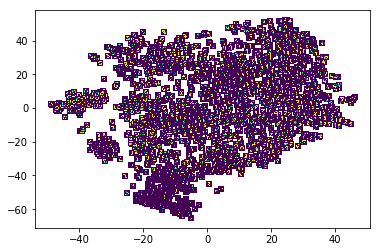

In [40]:
print("\n------Starting to plot------\n")

for i in range(len(result)):
    print("{}/{}".format(i,len(result)))
    image = mnist_test[i][0]
    imscatter(result[i,0],result[i,1], image=image ,zoom=0.2)

plt.show()